Test Image: L.tif
Best Match: 109_5.tif


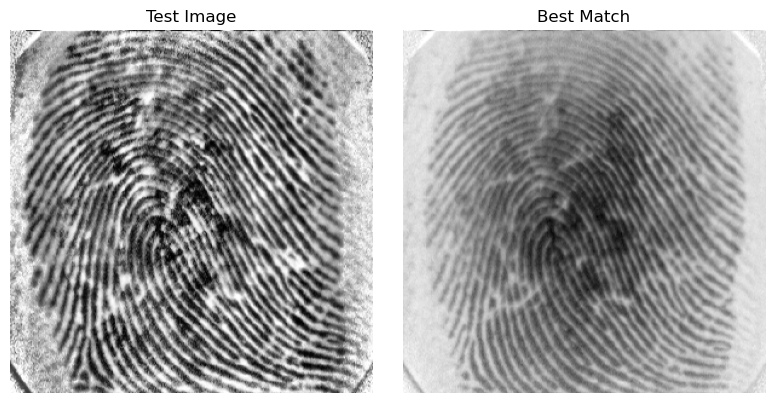

Test Image: M.tif
Best Match: 102_5.tif


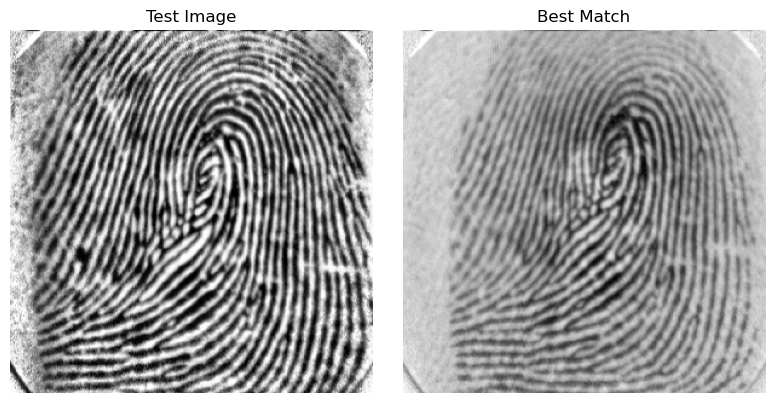

Test Image: O.tif
Best Match: 103_5.tif


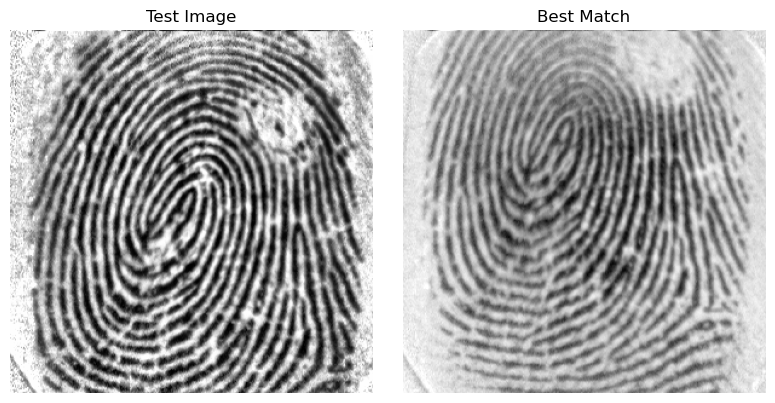

Test Image: N.tif
Best Match: 108_6.tif


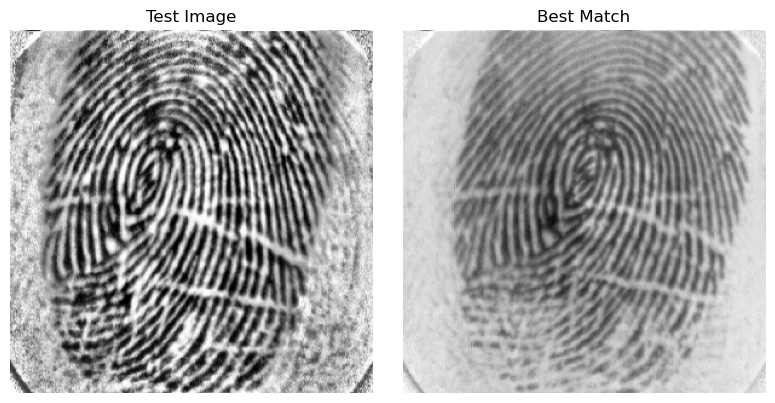

Test Image: J.tif
Best Match: 101_6.tif


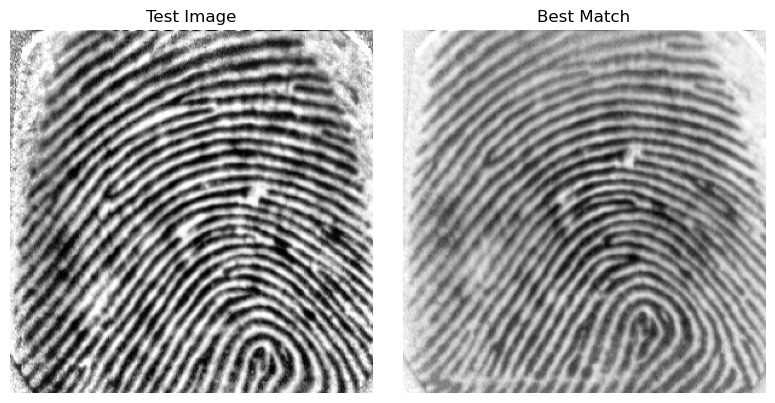

Test Image: K.tif
Best Match: 102_6.tif


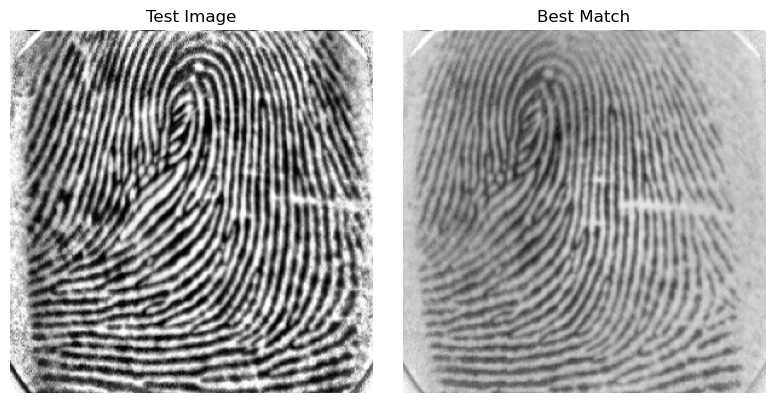

Test Image: I.tif
Best Match: 104_6.tif


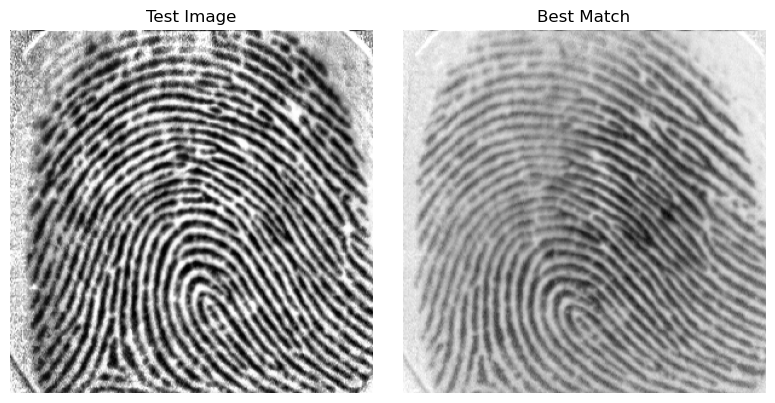

Test Image: H.tif
Best Match: 106_6.tif


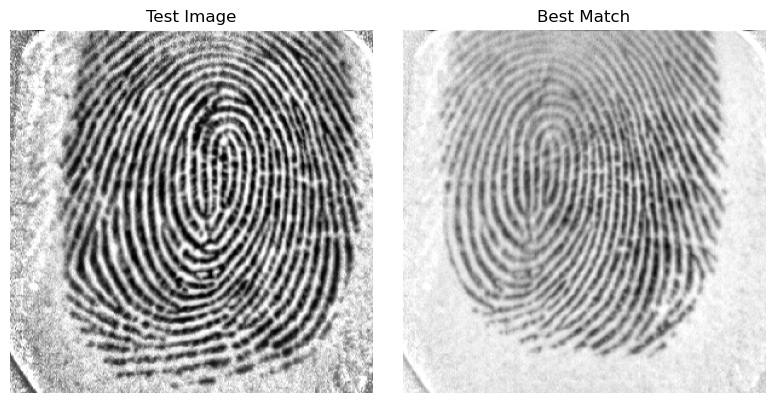

Test Image: E.tif
Best Match: 108_6.tif


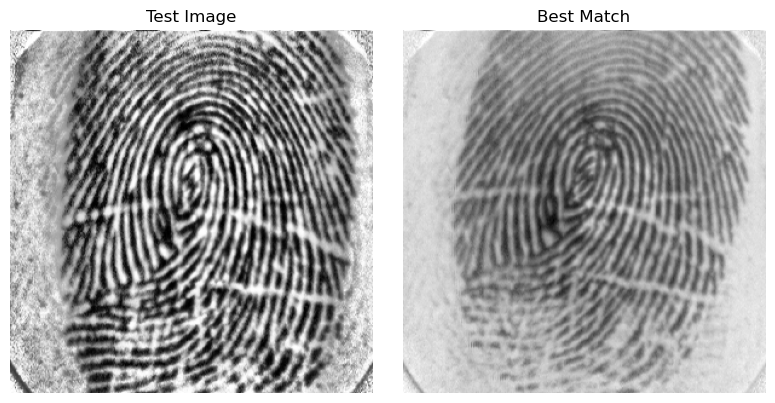

Test Image: R.tif
Best Match: 106_6.tif


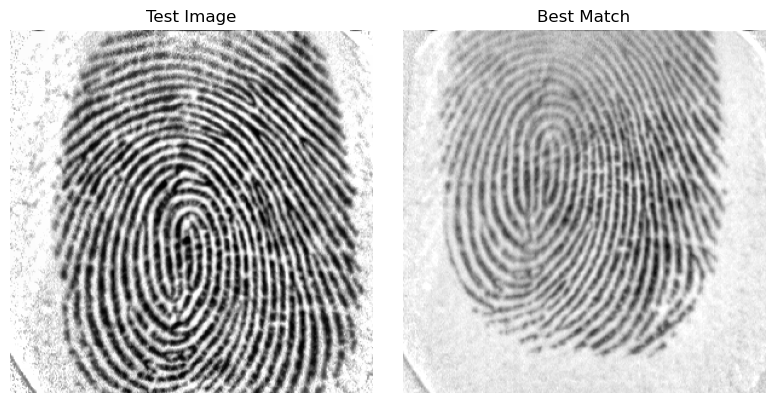

Test Image: S.tif
Best Match: 110_4.tif


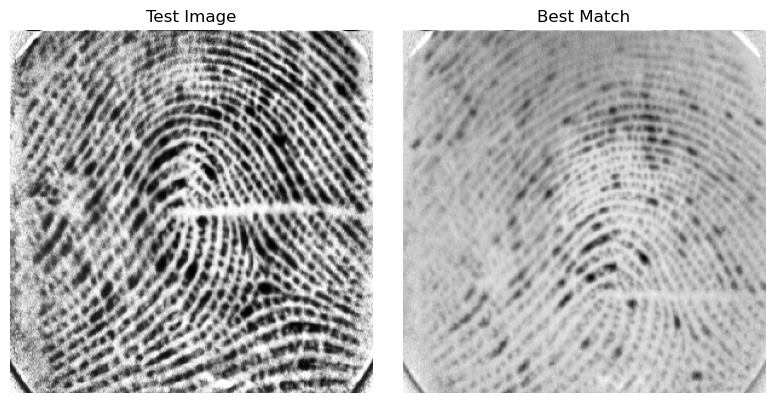

Test Image: D.tif
Best Match: 101_6.tif


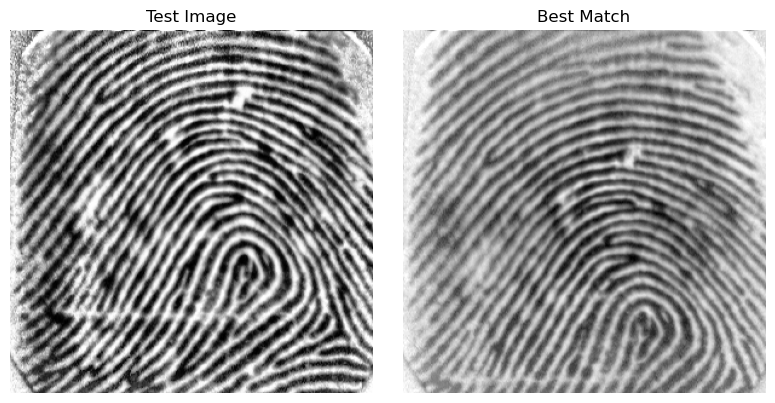

Test Image: F.tif
Best Match: 105_6.tif


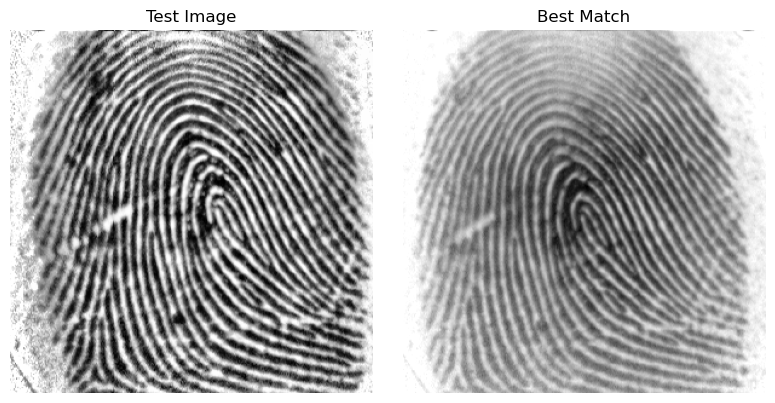

Test Image: Q.tif
Best Match: 107_6.tif


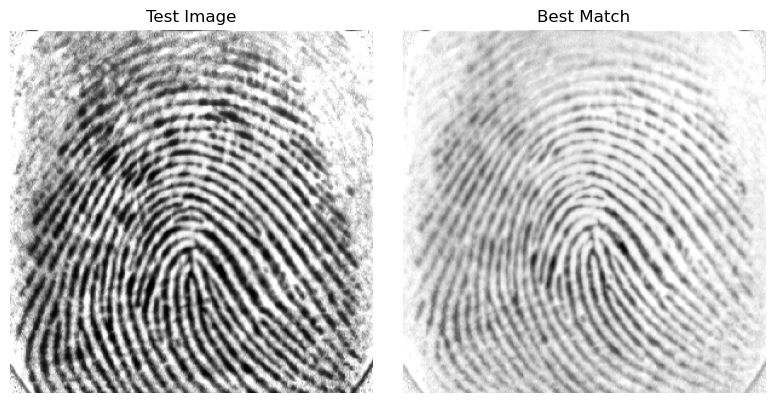

Test Image: P.tif
Best Match: 110_6.tif


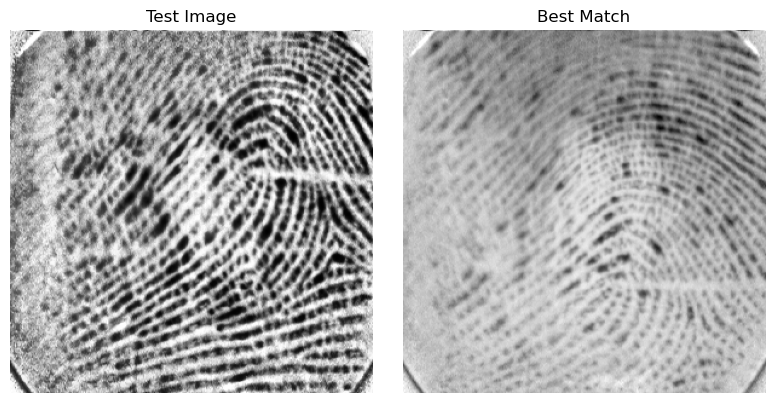

Test Image: G.tif
Best Match: 103_6.tif


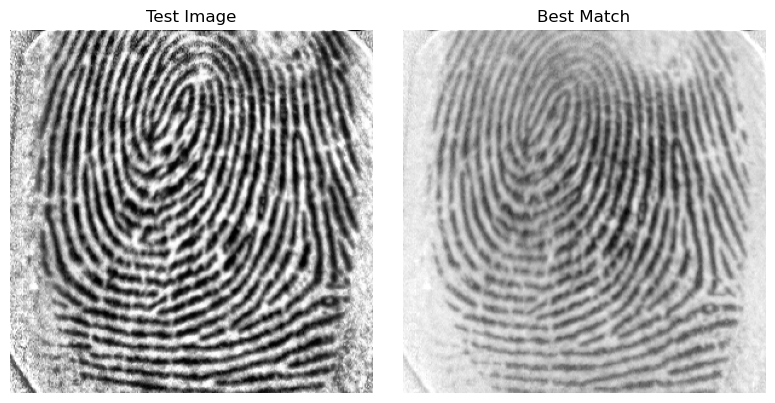

Test Image: T.tif
Best Match: 105_5.tif


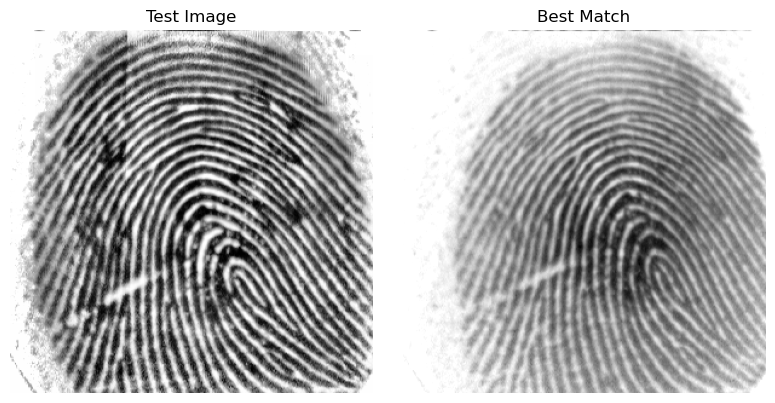

Test Image: C.tif
Best Match: 107_6.tif


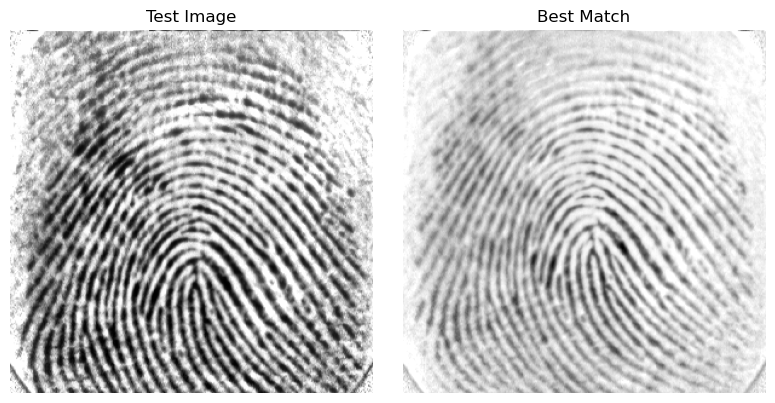

Test Image: B.tif
Best Match: 109_5.tif


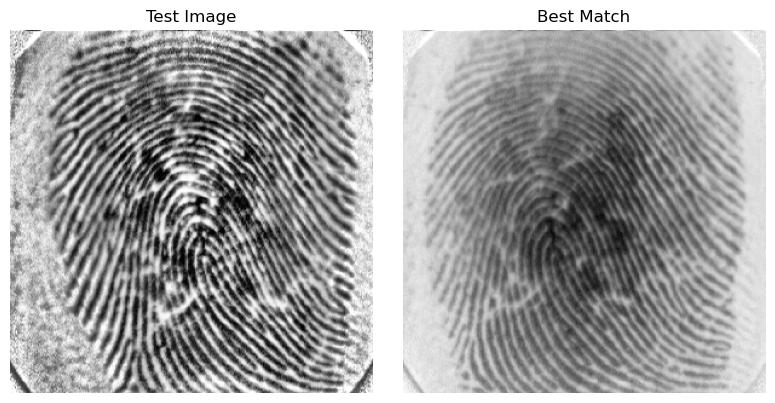

Test Image: A.tif
Best Match: 104_6.tif


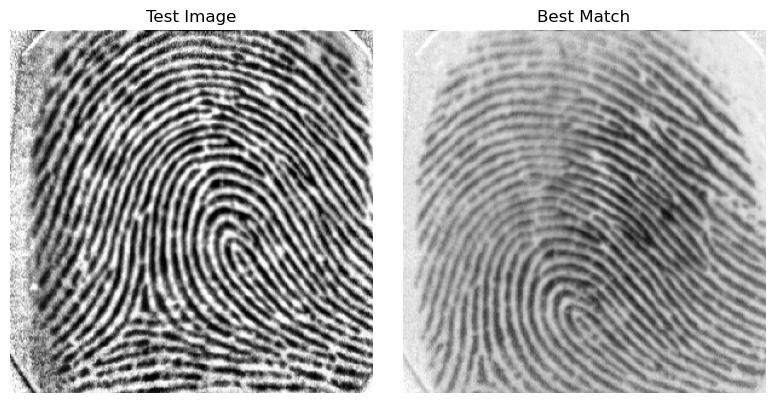

In [10]:
import cv2
import numpy as np
import os
from skimage import io, exposure
from skimage.feature import match_descriptors as match_desc
import matplotlib.pyplot as plt

def pre_image(image):
    img_adapteq = exposure.equalize_adapthist(image, clip_limit=0.03)
    img_adapteq = (img_adapteq * 255).astype(np.uint8)
    return img_adapteq

def extract_sift(image):
    sift = cv2.SIFT_create()
    key, desc = sift.detectAndCompute(image, None)
    return key, desc

def best_match(test_desc, db_desc):
    best_index = -1
    best_score = -1

    for i, db_desc in enumerate(db_desc):
        matches = match_desc(test_desc, db_desc)
        match_score = len(matches)

        if match_score > best_score:
            best_score = match_score
            best_index = i

    return best_index, best_score

def plot_comparison(image1, image1_name, image2, image2_name):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4))
    ax1.imshow(image1, cmap=plt.cm.gray)
    ax1.set_title(image1_name)
    ax1.axis('off')
    ax2.imshow(image2, cmap=plt.cm.gray)
    ax2.set_title(image2_name)
    ax2.axis('off')
    fig.tight_layout()

db_image_dir = "/Users/wanc/Desktop/Data Analytics/finger_print/fingerprint_lab/DB_image"
test_image_dir = "/Users/wanc/Desktop/Data Analytics/finger_print/fingerprint_lab/Test_image"

db_image_paths = [os.path.join(db_image_dir, filename) for filename in os.listdir(db_image_dir) if filename.endswith(".tif")]

db_key = []
db_desc = []

for image_path in db_image_paths:
    image = io.imread(image_path, as_gray=True)
    img_adapteq = pre_image(image)
    key, desc = extract_sift(img_adapteq)

    db_key.append(key)
    db_desc.append(desc)

test_paths = [os.path.join(test_image_dir, filename) for filename in os.listdir(test_image_dir) if filename.endswith(".tif")]

for test_path in test_paths:
    test_image = io.imread(test_path, as_gray=True)
    test_adap = pre_image(test_image)
    test_key, test_desc = extract_sift(test_adap)

    best_index, best_score = best_match(test_desc, db_desc)
    best_path = db_image_paths[best_index]

    best_image = io.imread(best_path, as_gray=True)
    test_name =  os.path.basename(test_path)
    best_name = os.path.basename(best_path)
    
    print(f"Test Image: {test_name}")
    print(f"Best Match: {best_name}")
    
    plot_comparison(test_adap, "Test Image", best_image, "Best Match")
    plt.show()